In [1]:
import pandas as pd
import numpy as np
import collections
import torch
import matplotlib

%matplotlib inline

In [2]:
from mmz.data import torch_datasets

from mmz.models import BaseTrainer, torch_gan

In [3]:
celeb_dataset = torch_datasets.CelebA(dataroot='/export/datasets/celeba/', 
                                      attr_path='/export/datasets/celeba/list_attr_celeba.csv',
                                      num_samples=None)

In [4]:
len(celeb_dataset)

202599

In [5]:
celeb_dl = celeb_dataset.to_dataloader(num_workers=4)

***

In [6]:
gen = torch_gan.make_model_from_block(torch_gan.CNNTransposeBlock, 
                                       z_dim=100, 
                                       n_channels=[64, 64, 64, 64],
                                       kernel_sizes=[4, 4, 4, 4],
                                       strides=[1, 2, 2, 2],
                                       paddings=[0, 1, 1, 1])

gen.add_module(name='output_conv', module=torch.nn.ConvTranspose2d(64, 3, 4, 2, 1))
gen.add_module(name='output_activ', module=torch.nn.Tanh())

In [7]:
disc = torch_gan.make_model_from_block(torch_gan.CNNBlock,
                                       z_dim=3,
                                       n_channels=[64, 64, 64, 64],
                                       kernel_sizes=[4, 4, 4, 4],
                                       strides=[2, 2, 2, 2],
                                       paddings=[1, 1, 1, 1]
                                      )
disc.add_module(name='output_conv', module=torch.nn.Conv2d(64, 1, 4, stride=1))
disc.add_module(name='output_activ', module=torch.nn.Sigmoid())

In [8]:
trainer = BaseTrainer(model_map=dict(gen=gen, disc=disc),
                      opt_map=dict(), data_gen=celeb_dl)

In [9]:
t_batch = next(iter(celeb_dl))

In [10]:
t_batch[0].shape

torch.Size([64, 3, 64, 64])

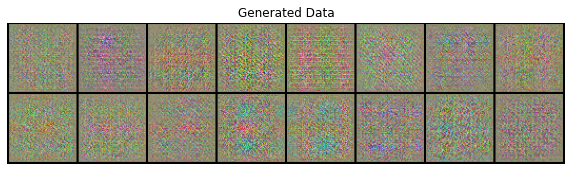

In [13]:
trainer.display_batch();

In [ ]:
results_l = trainer.train(25)

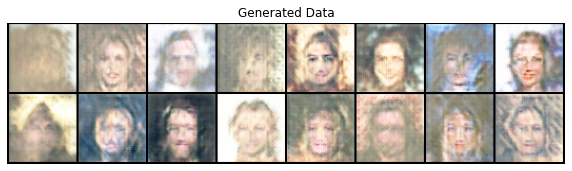

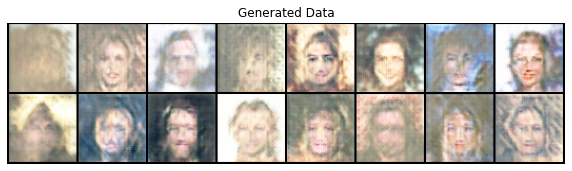

In [15]:
trainer.display_batch();

<AxesSubplot:xlabel='epoch,batch'>

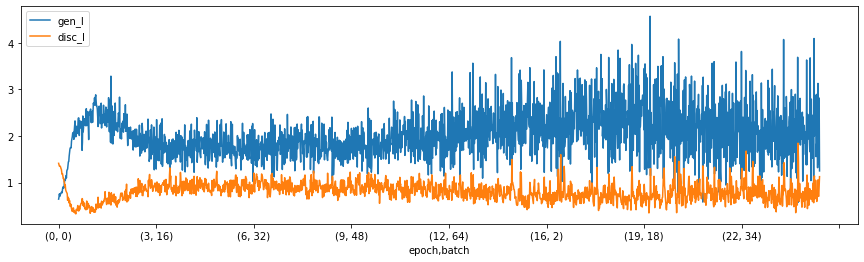

In [21]:
pd.DataFrame(results_l).set_index(['epoch', 'batch']).plot(figsize=(15, 4))